<a href="https://colab.research.google.com/github/kuds/rl-lunar-lander/blob/main/%5BLunar%20Lander%5D%20Soft%20Actor-Critic%20(SAC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Soft Actor-Critic (SAC)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's LunarLander-v2 environment.

### 1. Import the Necessary Packages

In [1]:
!pip install swig

In [2]:
!pip install stable_baselines3 gymnasium gymnasium[box2d]

In [3]:
import gymnasium
import stable_baselines3
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import VecFrameStack, VecTransposeImage
from stable_baselines3.common.vec_env import VecVideoRecorder

import torch
import numpy
import scipy
import platform
import IPython
import matplotlib
import matplotlib.pyplot

In [4]:
print("Python Version: {}".format(platform.python_version()))
print("Is Cuda Available: {}".format(torch.cuda.is_available()))
print("Torch Version: {}".format(torch.__version__))
print("Cuda Version: {}".format(torch.version.cuda))
print("Scipy Version: {}".format(scipy.__version__))
print("Numpy Version: {}".format(numpy.__version__))
print("Stable Baseline Version: {}".format(stable_baselines3.__version__))
print("IPython Version: {}".format(IPython.__version__))
print("Gymnasium Version: {}".format(gymnasium.__version__))

Python Version: 3.10.12
Is Cuda Available: True
Torch Version: 2.3.1+cu121
Cuda Version: 12.1
Scipy Version: 1.13.1
Numpy Version: 1.26.4
Stable Baseline Version: 2.3.2
IPython Version: 7.34.0
Gymnasium Version: 0.29.1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
env = gymnasium.make('LunarLanderContinuous-v2')
print("Observation space: ", env.observation_space)
print("Action space: ", env.action_space)
env.close()

Observation space:  Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
Action space:  Box(-1.0, 1.0, (2,), float32)


In [6]:
#env = gymnasium.make("LunarLander-v2", continuous=True)
env = make_vec_env("LunarLanderContinuous-v2", n_envs=1)

#env_val = gymnasium.make("LunarLander-v2", render_mode="rgb_array", continuous=True)
env_val = make_vec_env("LunarLanderContinuous-v2", n_envs=1)

eval_callback = EvalCallback(env_val, best_model_save_path="./logs/", log_path="./logs/", eval_freq=1000, render=False,  deterministic=True)

# Initialize PPO
model = SAC('MlpPolicy', env, verbose=0)

# Train the model
model.learn(total_timesteps=50000,  progress_bar=True, callback=eval_callback)

# Save the model
model.save("sac_lunar_lander")

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

env.close()
env_val.close()

Output()

Eval num_timesteps=1000, episode_reward=-277.84 +/- 90.27

Episode length: 226.00 +/- 106.06

New best mean reward!

Eval num_timesteps=2000, episode_reward=-384.77 +/- 115.43

Episode length: 262.00 +/- 153.69

Eval num_timesteps=3000, episode_reward=-206.31 +/- 46.19

Episode length: 884.20 +/- 127.56

New best mean reward!

Eval num_timesteps=4000, episode_reward=-203.76 +/- 49.12

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=5000, episode_reward=-172.06 +/- 62.45

Episode length: 593.00 +/- 53.97

New best mean reward!

Eval num_timesteps=6000, episode_reward=-179.77 +/- 116.57

Episode length: 944.40 +/- 77.96

Eval num_timesteps=7000, episode_reward=-96.37 +/- 20.11

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=8000, episode_reward=-50.82 +/- 12.47

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=9000, episode_reward=-111.47 +/- 35.03

Episode length: 773.80 +/- 113.05

Eval num_timesteps=10000, episode_reward=-142.44 +/- 56.50

Episode length: 697.80 +/- 364.37

Eval num_timesteps=11000, episode_reward=-115.70 +/- 34.47

Episode length: 428.20 +/- 254.46

Eval num_timesteps=12000, episode_reward=-195.24 +/- 24.49

Episode length: 599.20 +/- 144.06

Eval num_timesteps=13000, episode_reward=-60.71 +/- 21.01

Episode length: 818.80 +/- 362.40

Eval num_timesteps=14000, episode_reward=-258.26 +/- 316.73

Episode length: 997.00 +/- 6.00

Eval num_timesteps=15000, episode_reward=-143.10 +/- 96.77

Episode length: 527.80 +/- 239.05

Eval num_timesteps=16000, episode_reward=-58.41 +/- 15.23

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=17000, episode_reward=-58.25 +/- 13.20

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=18000, episode_reward=-43.36 +/- 13.09

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=19000, episode_reward=-118.88 +/- 79.67

Episode length: 513.80 +/- 397.07

Eval num_timesteps=20000, episode_reward=-142.94 +/- 120.46

Episode length: 890.40 +/- 139.15

Eval num_timesteps=21000, episode_reward=-252.63 +/- 235.42

Episode length: 616.60 +/- 298.44

Eval num_timesteps=22000, episode_reward=-281.89 +/- 40.17

Episode length: 726.00 +/- 290.72

Eval num_timesteps=23000, episode_reward=-47.01 +/- 21.50

Episode length: 819.00 +/- 362.00

Eval num_timesteps=24000, episode_reward=-16.28 +/- 13.58

Episode length: 1000.00 +/- 0.00

New best mean reward!

Eval num_timesteps=25000, episode_reward=-33.93 +/- 21.32

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=26000, episode_reward=-33.01 +/- 18.80

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=27000, episode_reward=-19.01 +/- 17.44

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=28000, episode_reward=-41.42 +/- 18.77

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=29000, episode_reward=-58.81 +/- 23.80

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=30000, episode_reward=-138.45 +/- 113.62

Episode length: 648.60 +/- 430.40

Eval num_timesteps=31000, episode_reward=-48.97 +/- 11.89

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=32000, episode_reward=-21.78 +/- 31.85

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=33000, episode_reward=-32.31 +/- 20.28

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=34000, episode_reward=-31.75 +/- 21.25

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=35000, episode_reward=-392.83 +/- 231.90

Episode length: 487.60 +/- 258.22

Eval num_timesteps=36000, episode_reward=-972.87 +/- 149.66

Episode length: 406.00 +/- 237.30

Eval num_timesteps=37000, episode_reward=-1176.37 +/- 337.36

Episode length: 440.40 +/- 39.61

Eval num_timesteps=38000, episode_reward=-153.76 +/- 84.14

Episode length: 284.00 +/- 142.28

Eval num_timesteps=39000, episode_reward=-522.33 +/- 270.88

Episode length: 293.80 +/- 85.59

Eval num_timesteps=40000, episode_reward=-158.00 +/- 111.57

Episode length: 172.00 +/- 148.18

Eval num_timesteps=41000, episode_reward=-138.77 +/- 54.23

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=42000, episode_reward=-86.49 +/- 9.62

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=43000, episode_reward=-67.19 +/- 13.21

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=44000, episode_reward=-84.98 +/- 22.69

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=45000, episode_reward=-129.27 +/- 33.11

Episode length: 312.20 +/- 132.29

Eval num_timesteps=46000, episode_reward=-141.54 +/- 50.79

Episode length: 592.80 +/- 245.09

Eval num_timesteps=47000, episode_reward=-77.14 +/- 16.77

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=48000, episode_reward=-71.79 +/- 15.84

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=49000, episode_reward=-86.51 +/- 11.53

Episode length: 1000.00 +/- 0.00

Eval num_timesteps=50000, episode_reward=-96.72 +/- 21.53

Episode length: 1000.00 +/- 0.00

Mean reward: -80.30 +/- 24.82


In [7]:
# Load the best model
env = make_vec_env("LunarLanderContinuous-v2", n_envs=1, seed=0)
best_model_path = "./logs/best_model.zip"
best_model = SAC.load(best_model_path, env=env)

mean_reward, std_reward = evaluate_policy(best_model, env, n_eval_episodes=15)
print(f"Best Model - Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Record video of the best model playing CarRacing
env = VecVideoRecorder(env, "./videos/", video_length=5000, record_video_trigger=lambda x: x == 0, name_prefix="best_model_lunar_lander_sac")

obs = env.reset()
for _ in range(5000):
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
    if dones:
        break

env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model - Mean reward: -29.78 +/- 17.91
Moviepy - Building video /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4.
Moviepy - Writing video /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/best_model_lunar_lander_sac-step-0-to-step-5000.mp4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


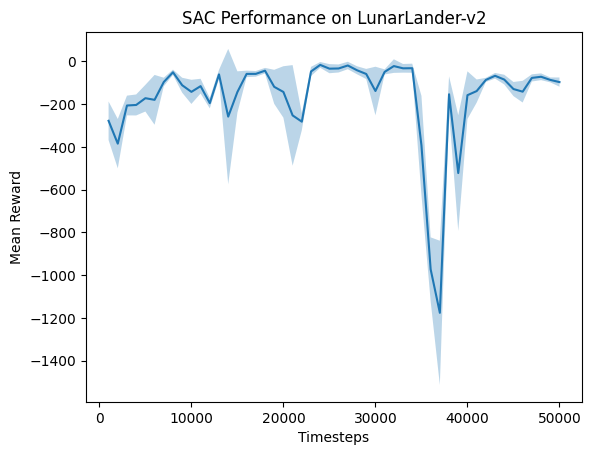

In [8]:
# Load the evaluations.npz file
data = numpy.load('./logs/evaluations.npz')

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = numpy.mean(results, axis=1)
std_results = numpy.std(results, axis=1)

# Plot the results
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(timesteps, mean_results)
matplotlib.pyplot.fill_between(timesteps, mean_results - std_results, mean_results + std_results, alpha=0.3)
matplotlib.pyplot.xlabel('Timesteps')
matplotlib.pyplot.ylabel('Mean Reward')
matplotlib.pyplot.title('SAC Performance on LunarLander-v2')
matplotlib.pyplot.show()